In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing and Preparing data

In [59]:
data = pd.read_csv("trainlinearregression.csv")
data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


# Plots

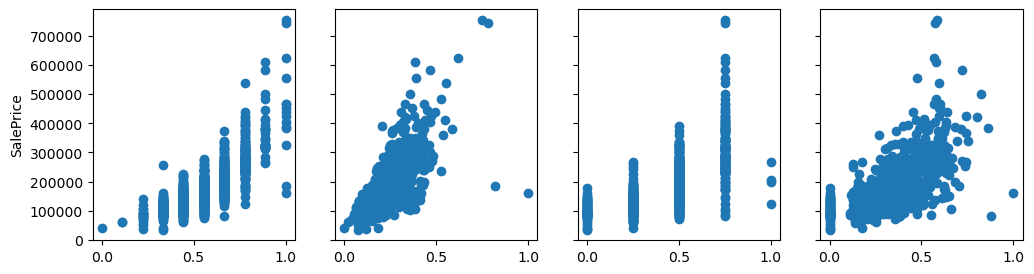

In [82]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train.iloc[:,i],y_train)
   
ax[0].set_ylabel("SalePrice")
plt.show()

# Scaling

In [60]:

def scale(data):
    y = data["SalePrice"]
    m, n = data.shape
    dataScaled = data.drop('SalePrice', axis=1)

   
    for i in range(n-1):  # Iterate over columns
        series = dataScaled.iloc[:, i]
        series_min = series.min()
        series_max = series.max()
        dataScaled.iloc[:, i] = (series - series_min) / (series_max - series_min)

    return dataScaled, y
    


# Training

In [61]:
def fit(X, Y):
    m, n = X.shape
    
    # initialization
    w = np.zeros(n)
    b = 0
    alpha = 0.01
    epochs = 100 #no. of iterations
    
    Cost = np.zeros(epochs)

    for i in range(epochs):
        Y_pred = X @ w + b
        
        D_w = (1/m) * X.T @ (Y_pred - Y)
        D_b = (1/m) * np.sum(Y_pred - Y)

        cost = (1/(2*m)) * np.sum(np.power(Y_pred - Y, 2))
        Cost[i] = cost

        w = w - alpha * D_w
        b = b - alpha * D_b

    return w, b, Cost


OverallQual     35249.724621
GrLivArea       15414.466494
GarageCars      28452.392327
GarageArea      21986.914716
TotalBsmtSF     11326.634223
1stFlrSF        12814.948022
FullBath        31328.898679
TotRmsAbvGrd    27773.888564
YearBuilt       41621.864840
YearRemodAdd    36103.792578
dtype: float64 51030.8833544762


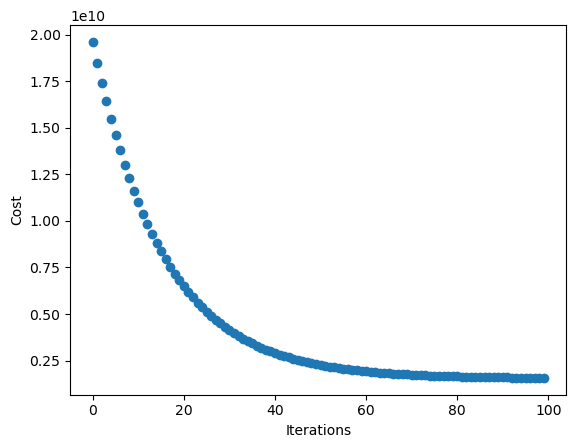

In [62]:
x_train, y_train = scale(data)
w, b, cost=fit(x_train, y_train)
print(w,b)
plt.scatter(np.linspace(0,len(cost)-1,len(cost)),cost)#linspace will form array frm 0 to len of cost-1 with len(cost) nos.
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.show()


In [63]:
test_data=pd.read_csv('testlinear.csv')


# Scaling test data


In [100]:
x_testscaled,y_test=scale(test_data)
r,c=x_testscaled.shape
print(x_testscaled)


     OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0       0.777778   0.476343        0.75    0.541727     0.339062  0.261905   
1       0.555556   0.368286        0.25    0.243165     0.387500  0.441176   
2       0.666667   0.237532        0.50    0.345324     0.187500  0.051821   
3       0.444444   0.344949        0.50    0.584173     0.487187  0.415616   
4       0.333333   0.047954        0.25    0.205755     0.196875  0.090336   
..           ...        ...         ...         ...          ...       ...   
287     0.555556   0.216752        0.50    0.414388     0.361875  0.275210   
288     0.555556   0.162084        0.25    0.189928     0.150938  0.038866   
289     0.555556   0.117647        0.50    0.302158     0.265000  0.166667   
290     0.666667   0.251279        0.50    0.279137     0.395625  0.313025   
291     0.555556   0.320972        0.50    0.282734     0.244688  0.143908   

     FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
0    0.6

# predicted y

In [101]:
y_predtest=x_testscaled@w+b

# Comparision Plots

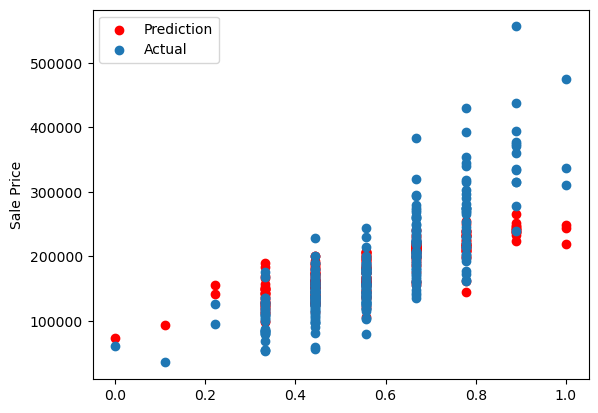

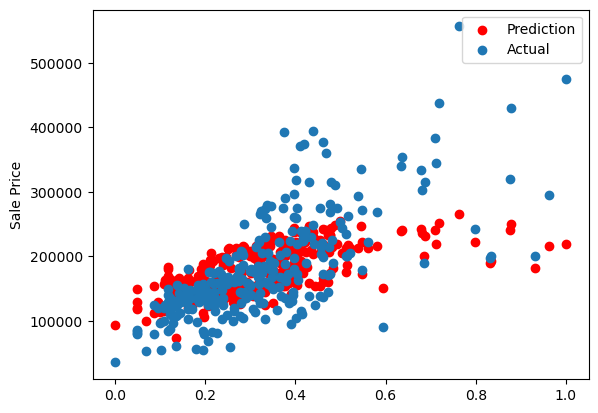

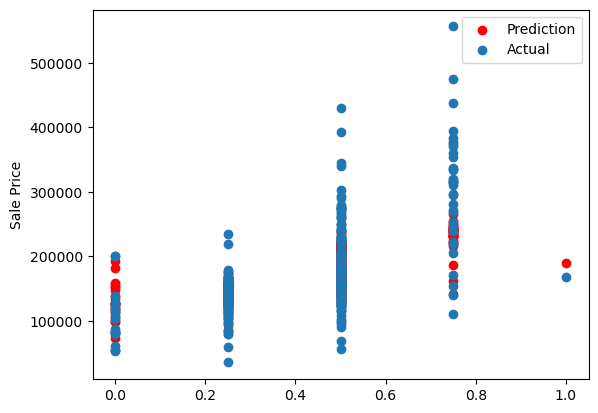

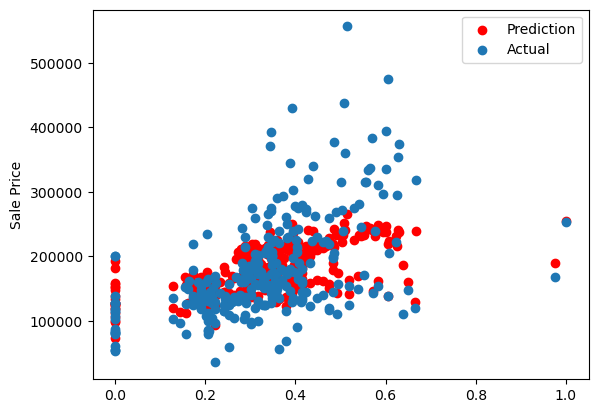

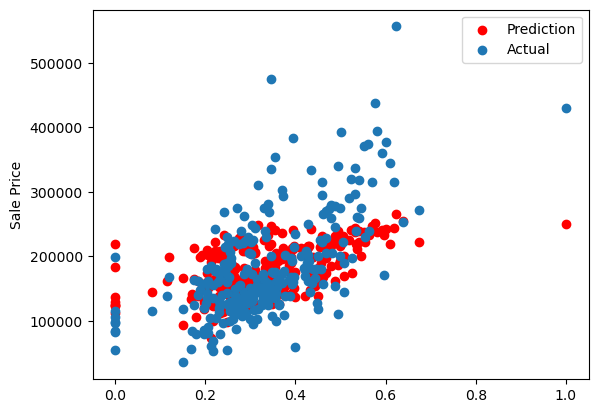

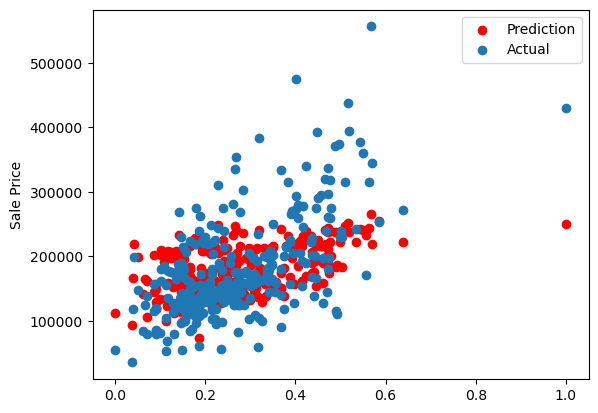

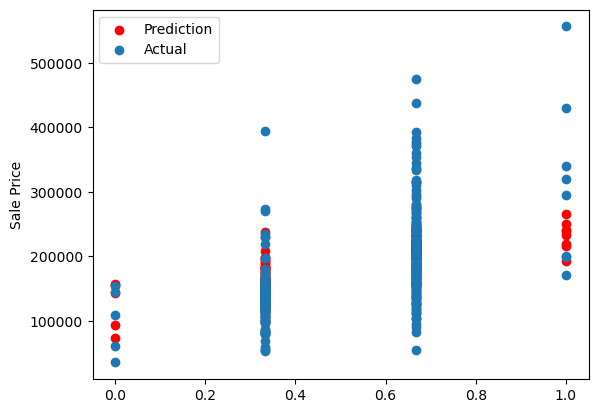

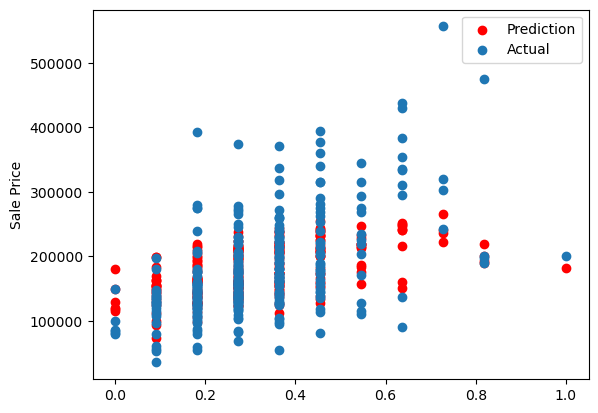

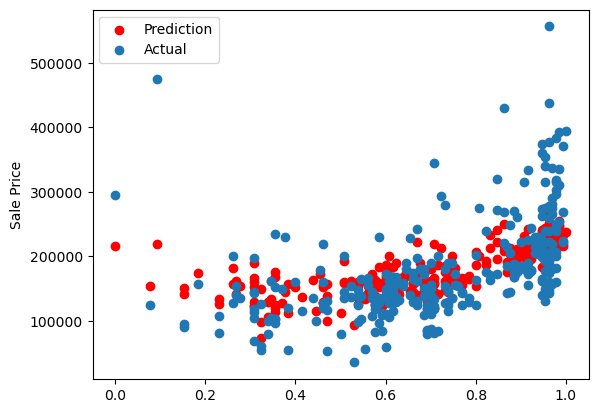

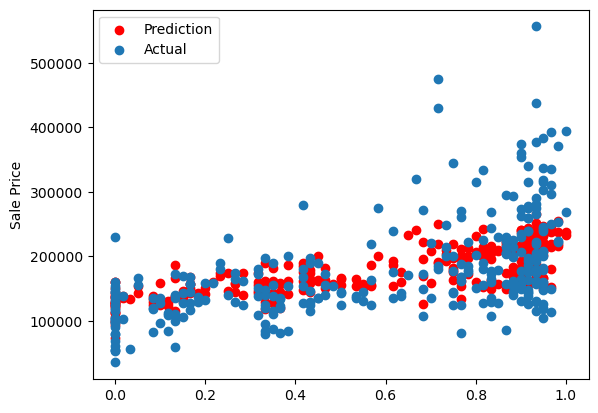

In [103]:

for j in range(c):
    plt.scatter(x_testscaled.iloc[:, j], y_predtest, color='r', label='Prediction')
    plt.scatter(x_testscaled.iloc[:, j], y_test, label='Actual')
    plt.ylabel('Sale Price')
    plt.legend()
    plt.show()

# Accuracy

In [75]:
error = np.abs(y_predtest - y_test)
error_percentage = np.abs(error * 100 / np.abs(y_test))
mean_accuracy_percentage = 100 - np.sum(error_percentage) / len(y_test)
print("Accuracy is:", mean_accuracy_percentage)


accuracy is: 79.06306310049524
